# Should we approve this loan?

The dataset is from the U.S. Small Business Administration (SBA) The U.S. SBA was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S. credit market (SBA Overview and History, US Small Business Administration (2015)). Small businesses have been a primary source of job creation in the United States; therefore, fostering small business formation and growth has social benefits by creating job opportunities and reducing unemployment. There have been many success stories of start-ups receiving SBA loan guarantees such as FedEx and Apple Computer. However, there have also been stories of small businesses and/or start-ups that have defaulted on their SBA-guaranteed loans.

We're going to see if we can predict whether we can predict if a company is going to default on their loan or not.

### Load Data

In [1]:
import pandas as pd
df = pd.read_csv('/Users/tashfiamamun/Downloads/SBA_loans_project_1.csv')
df

,index,City,State,Zip,Bank,BankState,NAICS,Term,NoEmp,NewExist,...,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,0,GLEN BURNIE,MD,21060,"BUSINESS FINANCE GROUP, INC.",VA,811111,240,7,1.0,...,7,1,1,0,N,"$743,000.00",$0.00,"$743,000.00","$743,000.00",P I F
1,1,WEST BEND,WI,53095,JPMORGAN CHASE BANK NATL ASSOC,IL,722410,240,20,1.0,...,0,1,0,N,N,"$137,000.00",$0.00,"$137,000.00","$109,737.00",P I F
2,2,SAN DIEGO,CA,92128,UMPQUA BANK,OR,0,120,2,1.0,...,0,1,0,0,N,"$280,000.00",$0.00,"$280,000.00","$210,000.00",P I F
3,3,WEBSTER,MA,1570,HOMETOWN BANK A CO-OPERATIVE B,MA,621310,84,7,1.0,...,0,1,1,0,Y,"$144,500.00",$0.00,"$144,500.00","$122,825.00",P I F
4,4,JOPLIN,MO,64804,U.S. BANK NATIONAL ASSOCIATION,OH,0,60,2,2.0,...,0,1,0,N,Y,"$52,500.00",$0.00,"$52,500.00","$42,000.00",P I F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809242,809242,BATON ROUGE,LA,70808,LOUISIANA CAP. CERT. DEVEL COM,LA,0,240,24,2.0,...,0,38605,0,N,N,"$749,000.00",$0.00,"$750,000.00","$750,000.00",P I F
809243,809243,GREENVILLE,SC,29611,SUNTRUST BANK,GA,0,72,5,1.0,...,0,1,0,N,Y,"$75,000.00",$0.00,"$75,000.00","$67,500.00",P I F
809244,809244,ST. PAUL,MN,55114,SUNRISE BANKS NATL ASSOC,MN,424990,120,31,1.0,...,31,1,1,0,N,"$216,900.00",$0.00,"$216,900.00","$162,675.00",P I F
809245,809245,TUSCALOOSA,AL,35401,BK OF TUSCALOOSA A DIVISION O,AL,0,120,4,2.0,...,0,1,1,N,N,"$75,000.00",$0.00,"$75,000.00","$60,000.00",P I F


In [2]:
# Get the shape of the dataset
print(df.shape)

(809247, 21)


In [3]:
#Summary Statistics
df.describe()

,index,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,809247.000000,809247.000000,809247.000000,809247.000000,809247.000000,809119.000000,809247.000000,809247.000000,809247.000000,809247.000000
mean,404623.000000,53800.937004,398573.783610,110.798776,11.414084,1.280276,8.415866,10.773366,2751.939176,0.757748
std,233609.630983,31186.367109,263354.979813,78.872428,74.529429,0.451692,236.288348,236.612053,12758.411810,0.646347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,202311.500000,27577.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,404623.000000,55411.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,606934.500000,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,809246.000000,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [4]:
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels


desc_df = describe_more(df)
desc_df

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,index,809247,int64,1,6,"{0: 1, 539491: 1, 539493: 1, 539494: 1, 539495..."
1,City,31320,object,1,30,"{'LOS ANGELES': 10372, 'HOUSTON': 9260, 'NEW Y..."
2,State,51,object,2,3,"{'CA': 117341, 'TX': 63425, 'NY': 51877, 'FL':..."
3,Zip,32731,int64,1,5,"{10001: 841, 90015: 830, 93401: 729, 90010: 65..."
4,Bank,5716,object,3,30,"{'BANK OF AMERICA NATL ASSOC': 78111, 'WELLS F..."
5,BankState,55,object,2,3,"{'CA': 106293, 'NC': 71557, 'IL': 59258, 'OH':..."
6,NAICS,1307,int64,1,6,"{0: 181845, 722110: 25217, 722211: 17476, 8111..."
7,Term,407,int64,1,3,"{84: 207228, 60: 80965, 240: 77385, 120: 69852..."
8,NoEmp,581,int64,1,4,"{1: 138836, 2: 124470, 3: 81466, 4: 66306, 5: ..."
9,NewExist,3,float64,3,3,"{1.0: 580478, 2.0: 227709, 0.0: 932}"


Columns 'DisbursementGross','BalanceGross','GrAppv','SBA_Appv' are listed as object, but they are numeric. We will convert them to Numeric

In [5]:
df['DisbursementGross'] = df['DisbursementGross'].str.replace('$', '').str.replace(',','')
df['DisbursementGross'] = pd.to_numeric(df['DisbursementGross'])

df['BalanceGross'] = df['BalanceGross'].str.replace('$', '').str.replace(',','')
df['BalanceGross'] = pd.to_numeric(df['BalanceGross'])

df['GrAppv'] = df['GrAppv'].str.replace('$', '').str.replace(',','')
df['GrAppv'] = pd.to_numeric(df['GrAppv'])

df['SBA_Appv'] = df['SBA_Appv'].str.replace('$', '').str.replace(',','')
df['SBA_Appv'] = pd.to_numeric(df['SBA_Appv'])


/var/folders/p8/yk_6vf8n4nv0754b4z62bfs00000gn/T/ipykernel_38275/317380463.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['DisbursementGross'] = df['DisbursementGross'].str.replace('$', '').str.replace(',','')
/var/folders/p8/yk_6vf8n4nv0754b4z62bfs00000gn/T/ipykernel_38275/317380463.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['BalanceGross'] = df['BalanceGross'].str.replace('$', '').str.replace(',','')
/var/folders/p8/yk_6vf8n4nv0754b4z62bfs00000gn/T/ipykernel_38275/317380463.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal 

In [6]:
# Create a correlation matrix
corr_metrics = df.select_dtypes(include='number').corr()
corr_metrics.style.background_gradient()

,index,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,DisbursementGross,BalanceGross,GrAppv,SBA_Appv
index,1.000000,0.001300,0.000829,0.000043,-0.000378,0.000704,-0.001838,-0.001828,-0.000810,-0.000378,0.000266,0.001396,-0.000034,0.000123
Zip,0.001300,1.000000,-0.033516,0.145780,0.014743,-0.038792,0.003642,0.003645,0.011604,-0.073074,0.092020,-0.000311,0.099031,0.105351
NAICS,0.000829,-0.033516,1.000000,-0.111546,-0.037078,0.047141,-0.039280,-0.036447,0.028374,0.436820,-0.047792,-0.000159,-0.056751,-0.063356
Term,0.000043,0.145780,-0.111546,1.000000,0.045751,-0.073491,0.027557,0.024830,0.028801,-0.203853,0.466092,0.001785,0.502741,0.525105
NoEmp,-0.000378,0.014743,-0.037078,0.045751,1.000000,-0.039480,0.008873,0.015509,0.006261,-0.041251,0.088322,-0.000118,0.090152,0.092355
NewExist,0.000704,-0.038792,0.047141,-0.073491,-0.039480,1.000000,-0.002324,-0.009396,0.124161,0.031579,-0.074067,0.001313,-0.066161,-0.063733
CreateJob,-0.001838,0.003642,-0.039280,0.027557,0.008873,-0.002324,1.000000,0.994071,0.001026,-0.029868,0.007192,-0.000058,0.008402,0.013967
RetainedJob,-0.001828,0.003645,-0.036447,0.024830,0.015509,-0.009396,0.994071,1.000000,-0.000557,-0.024792,0.010448,-0.000081,0.010844,0.014991
FranchiseCode,-0.000810,0.011604,0.028374,0.028801,0.006261,0.124161,0.001026,-0.000557,1.000000,-0.003185,0.059014,-0.000417,0.067382,0.068853
UrbanRural,-0.000378,-0.073074,0.436820,-0.203853,-0.041251,0.031579,-0.029868,-0.024792,-0.003185,1.000000,-0.034843,0.002375,-0.058795,-0.070683


We see that strong correlation exists between created and retained jobs, and GrAppv and SBA_Appv.
As the model has many features, we can use PCA to find out what our most important features are. Before that, we will encode our categorical variables:

### Handling Missing Values:

In [7]:
num_cols = df.select_dtypes('number').columns
cat_cols = df.select_dtypes('object').columns

print(f"Number of numerical columns: {len(num_cols)}")
print(f"Number of categorical columns: {len(cat_cols)}")

# number of numerical columns and categorical columns that contain missing data in train dataset
num_cols_with_na = num_cols[df[num_cols].isna().mean() > 0]
cat_cols_with_na = cat_cols[df[cat_cols].isna().mean() > 0]

print(f"*** numerical columns that have NaN's  ({len(num_cols_with_na)}): \n{num_cols_with_na}\n\n")
print(f"*** categorical columns that have NaN's ({len(cat_cols_with_na)}): \n{cat_cols_with_na}")

#Filling Numeric column with 0
df['NewExist'].fillna(0, inplace=True)


#fill categorical with "Missing" (except target column MIS)
df[['City', 'State', 'Bank', 
    'BankState', 'RevLineCr', 'LowDoc']]=df[['City', 'State', 
                                             'Bank', 'BankState', 'RevLineCr', 'LowDoc']].fillna("Missing")

#dropping the rows that have NA value for target variable
df.dropna(inplace=True)

Number of numerical columns: 14
Number of categorical columns: 7
*** numerical columns that have NaN's  (1): 
Index(['NewExist'], dtype='object')


*** categorical columns that have NaN's (7): 
Index(['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc',
       'MIS_Status'],
      dtype='object')


#### Encoding Target Variable MIS Status so that PIF(Paid in Full) = 0 and CHGOFF(Loan Charged off) =1

In [8]:
df['MIS_Status'].replace('P I F', 0,inplace = True)
df['MIS_Status'].replace('CHGOFF', 1,inplace = True)
df.MIS_Status.value_counts()

0    665576
1    141849
Name: MIS_Status, dtype: int64

#### Splitting the dataset

In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Create features
features = df.drop(["MIS_Status"], axis =1)

# Create labels
labels = df["MIS_Status"]

# Split our data
X_train, X_test, Y_train, Y_test = train_test_split(features,labels, random_state=10)

#### WOE Encoding Categorical Variables

In [10]:
import category_encoders as ce

woe = ce.WOEEncoder()

# fit the encoder
woe.fit(X_train, Y_train)

#transform data
X_train= woe.transform(X_train)
X_test = woe.transform(X_test)

### Scale Numeric Columns
We will need to scale numeric columns before passing through PCA

In [11]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a new variable
scaler = StandardScaler()

# Scale train_features and test_features
scaled_train_features = scaler.fit_transform(X_train)
scaled_test_features = scaler.transform(X_test)

### Principal Component Analysis on our scaled data

Now that we have preprocessed our data, we are ready to use PCA to determine by how much we can reduce the dimensionality of our data. We can use scree-plots and cumulative explained ratio plots to find the number of components to use in further analyses.
Scree-plots display the number of components against the variance explained by each component, sorted in descending order of variance. Scree-plots help us get a better sense of which components explain a sufficient amount of variance in our data. When using scree plots, an 'elbow' (a steep drop from one data point to the next) in the plot is typically used to decide on an appropriate cutoff.

[0.18423312 0.10552561 0.099009   0.07110213 0.06239435 0.05072147
 0.05008835 0.04991704 0.04928415 0.04633747 0.04520633 0.04021267
 0.03658062 0.03322251 0.02670743 0.02402169 0.02183798 0.00254898
 0.00071946 0.00032965]


Text(0.5, 0, 'Principal Component #')

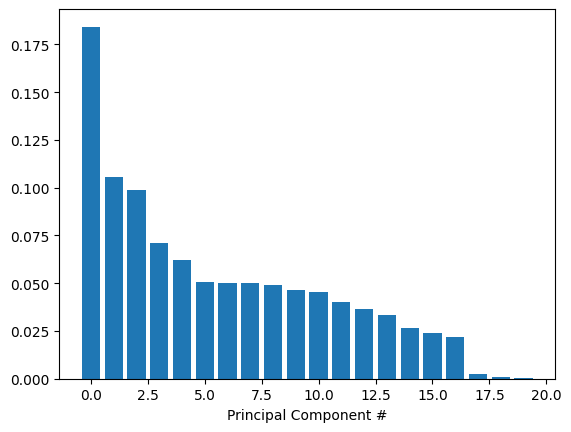

In [12]:
# This is just to make plots appear in the notebook
%matplotlib inline

# Import our plotting module, and PCA class
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_
print(exp_variance)
#plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(20), exp_variance)
ax.set_xlabel('Principal Component #')

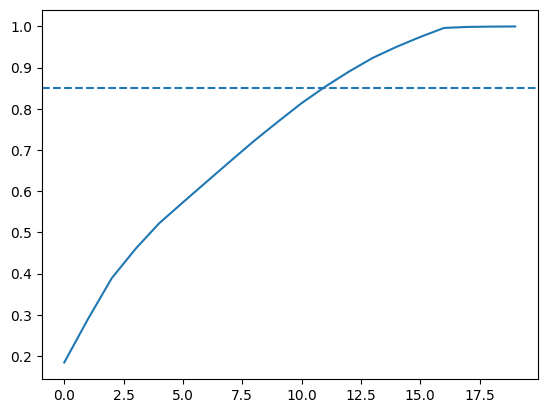

In [13]:
# Import numpy
import numpy as np

# Calculate the cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(range(20),cum_exp_variance)
ax.axhline(y=0.85, linestyle='--')

In [14]:
# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components=11, random_state=10)

# Fit and transform the scaled training features using pca
train_pca = pca.fit_transform(scaled_train_features)

# Fit and transform the scaled test features using pca
test_pca = pca.transform(scaled_test_features)

In [15]:
# Import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier


# Train our decision tree
tree = DecisionTreeClassifier(random_state=10)

tree.fit(train_pca,Y_train)

# Predict the labels for the test data
pred_labels_tree = tree.predict(test_pca)

In [16]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
logreg = LogisticRegression(random_state=10)
logreg.fit(train_pca,Y_train)
pred_labels_logreg = logreg.predict(test_pca)

# Create the classification report for both models
from sklearn.metrics import classification_report as cr
class_rep_tree = cr(Y_test,pred_labels_tree)
class_rep_log = cr(Y_test,pred_labels_logreg)

print("Decision Tree: \n", class_rep_tree)
print("Logistic Regression: \n", class_rep_log)

Decision Tree: 
               precision    recall  f1-score   support

           0       0.89      0.88      0.88    166524
           1       0.46      0.48      0.47     35333

    accuracy                           0.81    201857
   macro avg       0.67      0.68      0.68    201857
weighted avg       0.81      0.81      0.81    201857

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91    166524
           1       0.65      0.17      0.27     35333

    accuracy                           0.84    201857
   macro avg       0.75      0.57      0.59    201857
weighted avg       0.81      0.84      0.80    201857



With PCA, we notice that recall is quite low, this is probably due to the unbalanced nature of the dataset, there are more '0' in the dataset than '1'.
Let us try to see what its like without PCA and using all features.



### 1. Decision Tree

First we will fit a decision tree with training data.

In [17]:
# Train our decision tree
dtree = DecisionTreeClassifier(random_state=10)

dtree.fit(X_train,Y_train)



DecisionTreeClassifier(random_state=10)

In [19]:
dt_predicted_y=dtree.predict(X_test)
dt_predicted_y

array([1, 0, 1, ..., 1, 0, 1])

fi score is 0.9220820438717408


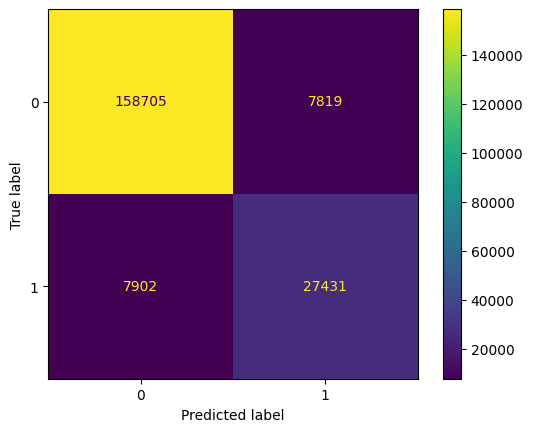

In [20]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
print("fi score is", f1_score(Y_test,dt_predicted_y, average='weighted'))

# Confusion matrix:
cm =confusion_matrix(Y_test,dt_predicted_y)
disp_woe = ConfusionMatrixDisplay(confusion_matrix = cm)
disp_woe.plot()
plt.show()

In [21]:
# Create the classification report 
class_rep_dt = cr(Y_test,dt_predicted_y)

print("Decision Tree: \n", class_rep_dt)


Decision Tree: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95    166524
           1       0.78      0.78      0.78     35333

    accuracy                           0.92    201857
   macro avg       0.87      0.86      0.87    201857
weighted avg       0.92      0.92      0.92    201857



### 2. Logistic  Regression

In [22]:
# Train our Logistic Regression
logit = LogisticRegression(random_state=10)

logit.fit(X_train,Y_train)

# Predict the labels for the test data
logit_predicted_y = logit.predict(X_test)


Accuracy on training set: 0.829
Accuracy on test set: 0.830


/Users/tashfiamamun/ml-spring-2023/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


fi score is 0.7692926178235906


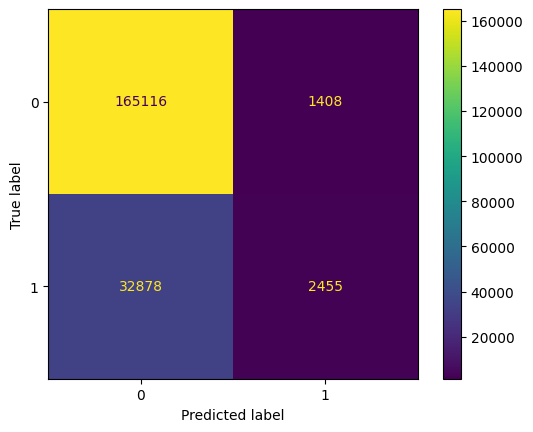

In [23]:
print("fi score is", f1_score(Y_test,logit_predicted_y, average='weighted'))

# Confusion matrix:
cm1 =confusion_matrix(Y_test,logit_predicted_y)
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm1)
disp_cm.plot()
plt.show()

In [24]:
# Create the classification report 
class_rep_logit = cr(Y_test,logit_predicted_y)

print("Logistic Regression: \n", class_rep_logit)



LOgistic Regression: 
               precision    recall  f1-score   support

           0       0.83      0.99      0.91    166524
           1       0.64      0.07      0.13     35333

    accuracy                           0.83    201857
   macro avg       0.73      0.53      0.52    201857
weighted avg       0.80      0.83      0.77    201857



### 3. Random Forest

In [33]:
# Train our Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10)

rf.fit(X_train,Y_train)

# Predict the labels for the test data
rf_predicted_y = rf.predict(X_test)


f1 score is 0.9422633574498962


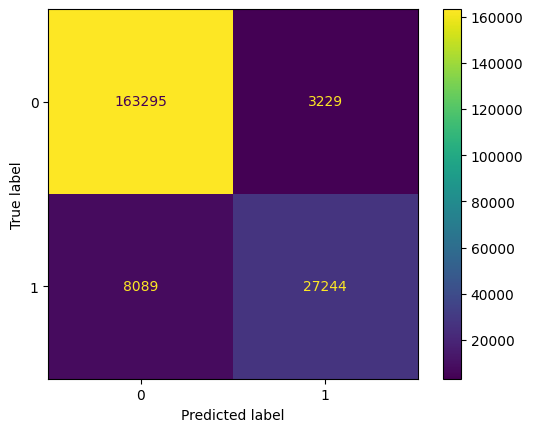

In [34]:
print("f1 score is", f1_score(Y_test,rf_predicted_y, average='weighted'))

# Confusion matrix:
cm2 =confusion_matrix(Y_test,rf_predicted_y)
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm2)
disp_cm.plot()
plt.show()

In [35]:
# Create the classification report 
class_rep_rf = cr(Y_test,rf_predicted_y)

print("Random Forest: \n", class_rep_rf)

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97    166524
           1       0.89      0.77      0.83     35333

    accuracy                           0.94    201857
   macro avg       0.92      0.88      0.90    201857
weighted avg       0.94      0.94      0.94    201857



### KNN

In [28]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the classifier to the training data
knn.fit(X_train, Y_train)

# Predict the labels for the test data
knn_predicted_y = knn.predict(X_test)

print("Accuracy on training set: {:.3f}".format(knn.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test,Y_test)))


Accuracy on training set: 0.872
Accuracy on test set: 0.809


fi score is 0.7613688662712711


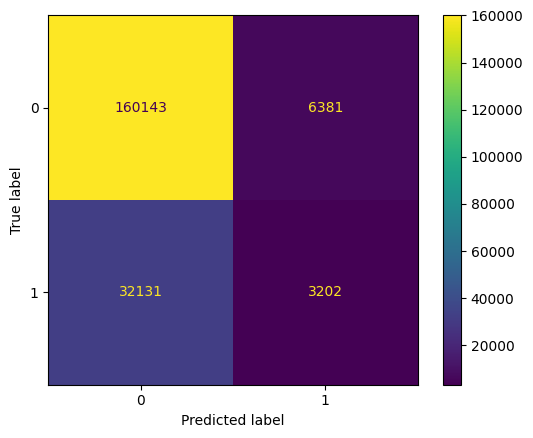

In [29]:
print("fi score is", f1_score(Y_test,knn_predicted_y, average='weighted'))

# Confusion matrix:
cm3 =confusion_matrix(Y_test,knn_predicted_y)
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm3)
disp_cm.plot()
plt.show()

In [30]:
# Create the classification report 
class_rep_knn = cr(Y_test,knn_predicted_y)

print("KNN: \n", class_rep_knn)

KNN: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89    166524
           1       0.33      0.09      0.14     35333

    accuracy                           0.81    201857
   macro avg       0.58      0.53      0.52    201857
weighted avg       0.75      0.81      0.76    201857



### Tune Hyperparameters

In [31]:
# Define hyperparameter 
parameters = {'max_depth': [5, 10, 12, 15, 20],
              'min_samples_split': [25, 50, 75],
              'min_impurity_decrease': [0.0, 0.02, 0.05],
               'criterion' : ['entropy', 'gini'],
             'max_features': ['sqrt', 'log2', None],
             }

dtc = DecisionTreeClassifier(random_state=0)

In [32]:
from sklearn.model_selection import RandomizedSearchCV



# Define the hyperparameter space to search over
param_grid = {
    'max_depth': np.arange(2, 20),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

# Perform randomized search over the hyperparameter space
random_search = RandomizedSearchCV(
    dtc, param_distributions=parameters, n_iter=100,
    cv=5, scoring='f1', random_state=10
)

# Fit the randomized search to the data
random_search.fit(X_train, Y_train)

# Print the best hyperparameters and corresponding score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)


KeyboardInterrupt: 

In [ ]:
bm= random_search.best_estimator_
bm

In [ ]:
p_pred_y = bm.predict(X_test)

In [ ]:
# Report the best parameters and best score
print("Best parameters: ", random_search.best_params_)
print("Best F1 Score: ", random_search.best_score_)

In [ ]:
print("fi score is", f1_score(Y_test,p_pred_y, average='weighted'))